# 使用 sklearn 来进行多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

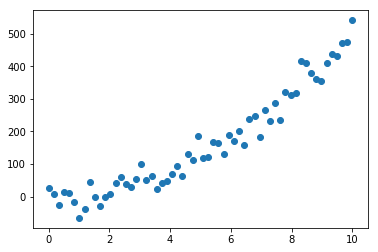

In [2]:
x = np.linspace(0,10,60)
error = np.random.randn(len(x))*31-15
y = 5*x*x + 15 + error
plt.scatter(x,y)

In [5]:
from sklearn.preprocessing import PolynomialFeatures   # 增加特征
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
xtr, xt, ytr, yt = train_test_split(x.reshape(-1,1),y)

In [8]:
pf = PolynomialFeatures(degree=4)
pf.fit(xtr)
xtr_std = pf.transform(xtr)

In [10]:
lr = LinearRegression()
lr.fit(xtr_std, ytr)
xt_std = pf.transform(xt)
lr.score(xt_std,yt)

0.9440539652781325

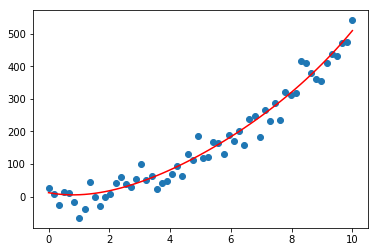

In [11]:
yp = lr.predict(pf.transform(x.reshape(-1,1)))
plt.scatter(x,y)
plt.plot(x, yp, 'r')
plt.show()

# pipeline  简单创建一个流程来处理问题

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("scaling", StandardScaler()),
    ("linearRegression", LinearRegression())
])
poly_reg2 = Pipeline([
    ("poly", PolynomialFeatures(degree=1)),
    ("scaling", StandardScaler()),
    ("linearRegression", LinearRegression())
])
poly_reg3 = Pipeline([
    ("poly", PolynomialFeatures(degree=20)),
    ("scaling", StandardScaler()),
    ("linearRegression", LinearRegression())
])

In [23]:
print(xtr.shape)
poly_reg.fit(xtr,ytr)
poly_reg.score(xt,yt)

(45, 1)


0.9426713224527995

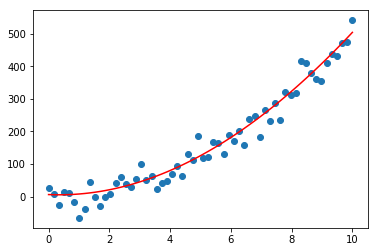

In [18]:
yp = poly_reg.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.plot(x, yp, 'r')
plt.show()

# 学习曲线

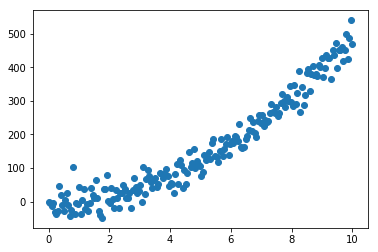

In [24]:
x = np.linspace(0,10,200)
error = np.random.randn(len(x))*31-15
y = 5*x*x + 15 + error
plt.scatter(x,y)
xtr, xt, ytr, yt = train_test_split(x.reshape(-1,1),y)

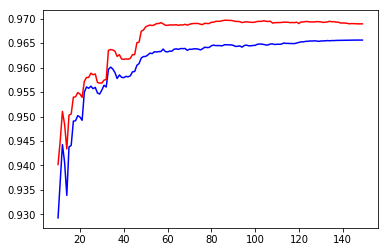

In [27]:
# 二次方拟合
tras = []
tsas = []
ind = []
for i in range(10,150):
    #print(xtr[0:i+1].shape)
    poly_reg.fit(xtr[0:i+1],ytr[0:i+1])
    tra = poly_reg.score(xtr,ytr)
    tsa = poly_reg.score(xt,yt)
    tras.append(tra)
    tsas.append(tsa)
    ind.append(i)
plt.plot(ind,tras,'b')
plt.plot(ind,tsas,'r')
plt.show()

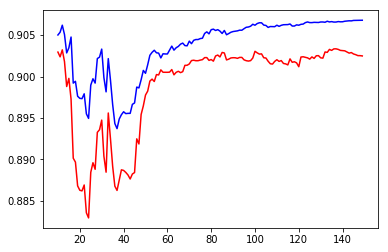

In [30]:
# 线性拟合
tras = []
tsas = []
ind = []
for i in range(10,150):
    #print(xtr[0:i+1].shape)
    poly_reg2.fit(xtr[0:i+1],ytr[0:i+1])
    tra = poly_reg2.score(xtr,ytr)
    tsa = poly_reg2.score(xt,yt)
    tras.append(tra)
    tsas.append(tsa)
    ind.append(i)
plt.plot(ind,tras,'b')
plt.plot(ind,tsas,'r')
plt.show()

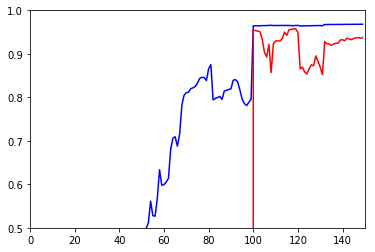

In [36]:
# 20次方拟合
tras = []
tsas = []
ind = []
for i in range(10,150):
    #print(xtr[0:i+1].shape)
    poly_reg3.fit(xtr[0:i+1],ytr[0:i+1])
    tra = poly_reg3.score(xtr,ytr)
    tsa = poly_reg3.score(xt,yt)
    tras.append(tra)
    tsas.append(tsa)
    ind.append(i)
plt.plot(ind,tras,'b')
plt.plot(ind,tsas,'r')
plt.axis([0,150,0.5,1])
plt.show()